In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
import itertools
import numpy as np
import seaborn as sb
import pickle

In [3]:
data=pd.read_csv('/content/drive/MyDrive/train.csv')
df=data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.shape

(20800, 5)

In [6]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [8]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
data=data.drop(['title'],axis=1)
data=data.drop("id",axis=1)
data=data.drop("author",axis=1)
data

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [10]:
def data_qualityCheck():
    print("Checking data qualitites...")
    data.isnull().sum()
    data.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB
check finished.


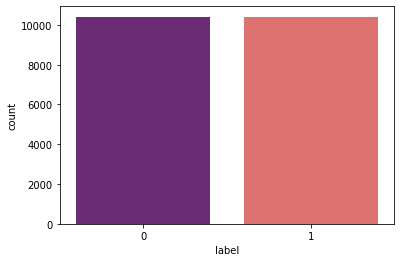

In [11]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x='label', data=data, palette='magma')


In [12]:
x=data.iloc[:,-2].values

y=data.iloc[:,-1].values

In [13]:
data['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [14]:
x[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [15]:
y[0]

1

In [16]:
fake=data.loc[data['label']==1]
fake=fake['text']
fake=fake[:10]
print(fake)

0     House Dem Aide: We Didn’t Even See Comey’s Let...
2     Why the Truth Might Get You Fired October 29, ...
3     Videos 15 Civilians Killed In Single US Airstr...
4     Print \nAn Iranian woman has been sentenced to...
6     Ever wonder how Britain’s most iconic pop pian...
12    The mystery surrounding The Third Reich and Na...
13    Clinton Campaign Demands FBI Affirm Trump's Ru...
14    Yes, There Are Paid Government Trolls On Socia...
17    A Caddo Nation tribal leader has just been fre...
18    FBI Closes In On Hillary! Posted on Home » Hea...
Name: text, dtype: object


In [17]:
comment_words = ' '
  

for val in fake: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '



In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS) 

In [19]:
wordcloud = WordCloud(width = 800, height = 800, 
              
                stopwords = stopwords, 
                min_font_size = 10)

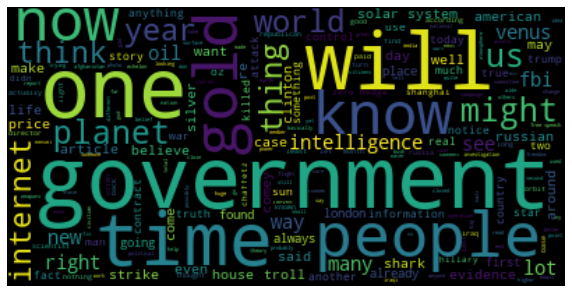

In [20]:
wordcloud = WordCloud().generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
real=data.loc[data['label']==0]
real=real['text']
real=real[:10]
print(real)

1     Ever get the feeling your life circles the rou...
5     In these trying times, Jackie Mason is the Voi...
7     PARIS  —   France chose an idealistic, traditi...
8     Donald J. Trump is scheduled to make a highly ...
9     A week before Michael T. Flynn resigned as nat...
10    Organizing for Action, the activist group that...
11    The BBC produced spoof on the “Real Housewives...
15    Guillermo Barros Schelotto was not the first A...
16    The scandal engulfing Wells Fargo toppled its ...
19    Wednesday after   Donald Trump’s press confere...
Name: text, dtype: object


In [22]:
comment_words_real = ' '
  

for val in real: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words_real = comment_words_real + words + ' '



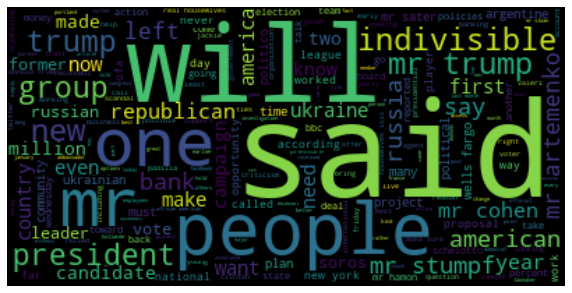

In [23]:
wordcloud = WordCloud().generate(comment_words_real)
plt.figure(figsize = (10, 10), facecolor = None) 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:

from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
#text=['Coronovirus affected people having serious symptoms should have a medical checkup','Children wont affect to coronovirus']
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500)

In [26]:
!pip install nltk
import nltk

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [29]:
df=data

In [31]:
import re
df['text']=df['text'].apply(str)
ps = PorterStemmer()
corpus=[]
for i in range(0,len(df)):
  review=re.sub('[^a-zA-Z]',' ',df['text'][i])
  review=review.lower()
  list=review.split()
  review=[ps.stem(word) for word in list if not word in set(stopwords.words('english'))]
  corpus.append(' '.join(review))

In [32]:
count_train = cv.fit_transform(corpus)

In [33]:
def get_countVectorizer_stats():  
    print(cv.vocabulary_)
get_countVectorizer_stats()

{'hous': 203, 'aid': 13, 'even': 138, 'see': 391, 'comey': 82, 'octob': 307, 'american': 23, 'person': 327, 'world': 492, 'week': 477, 'fbi': 153, 'director': 120, 'accord': 1, 'democrat': 113, 'look': 258, 'like': 251, 'also': 20, 'know': 230, 'second': 388, 'well': 478, 'turn': 455, 'announc': 25, 'email': 132, 'may': 270, 'relat': 368, 'hillari': 197, 'clinton': 78, 'committe': 84, 'hear': 194, 'found': 169, 'one': 313, 'republican': 373, 'member': 274, 'intellig': 215, 'agenc': 11, 'recent': 366, 'order': 316, 'inform': 213, 'long': 257, 'went': 479, 'set': 397, 'polit': 334, 'learn': 240, 'appear': 28, 'investig': 219, 'case': 67, 'cours': 97, 'actual': 8, 'say': 386, 'littl': 254, 'thing': 438, 'fact': 149, 'matter': 269, 'alreadi': 19, 'win': 484, 'least': 241, 'two': 457, 'year': 496, 'possibl': 337, 'entir': 135, 'term': 435, 'thought': 441, 'work': 490, 'result': 377, 'nation': 291, 'head': 192, 'told': 447, 'time': 445, 'twitter': 456, 'receiv': 365, 'govern': 186, 'made': 2

In [34]:
mat_body=cv.fit_transform(corpus).todense()

In [35]:
x_mat=mat_body
x_mat

matrix([[0, 3, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 2, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]])

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_mat,y,test_size=0.3,random_state=53)

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_pred_dtc_cv=dtc.predict(x_test)

In [38]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="Greens"):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #text purpose
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #labels purpose
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

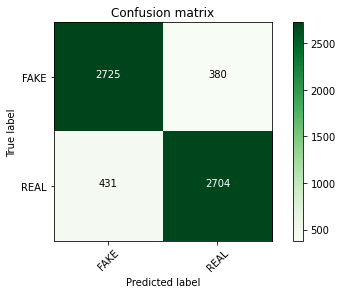

In [39]:
cm_cv = metrics.confusion_matrix(y_test,y_pred_dtc_cv , labels=[1, 0])
plot_confusion_matrix(cm_cv, classes=['FAKE','REAL'])

In [40]:
from sklearn import metrics
score = metrics.accuracy_score(y_test,y_pred_dtc_cv)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.0%


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)

print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv1=TfidfVectorizer(max_features=500)
mat_body1=cv1.fit_transform(corpus).todense()

In [43]:
x_mat1=mat_body1
x_mat1

matrix([[0.        , 0.08041149, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03196629, 0.        , 0.        , ..., 0.05682621, 0.        ,
         0.        ],
        ...,
        [0.04541617, 0.03347855, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.04633876, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_mat1,y,test_size=0.3,random_state=53)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier(criterion='entropy')
dtc1.fit(x_train,y_train)
y_pred_dtc_tfidf=dtc1.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_dtc_tfidf)

array([[2680,  455],
       [ 396, 2709]])

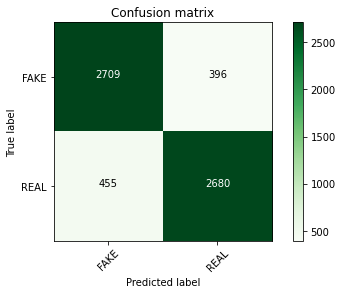

In [47]:
cm_tfidf = metrics.confusion_matrix(y_test,y_pred_dtc_tfidf , labels=[1, 0])
plot_confusion_matrix(cm_tfidf, classes=['FAKE','REAL'])

In [48]:
from sklearn import metrics
score = metrics.accuracy_score(y_test,y_pred_dtc_tfidf)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 86.36%


In [49]:
#encode document
vector=vectorizer.transform(df)
print(vector)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(corpus,y,test_size=0.3,random_state=53)

In [51]:

count_vectorizer = CountVectorizer(stop_words='english')

In [52]:
count_train = count_vectorizer.fit_transform(x_train)

In [53]:
print(count_vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [54]:
print(count_train)

  (0, 40388)	1
  (0, 14122)	1
  (0, 53439)	1
  (0, 24491)	1
  (0, 58603)	1
  (0, 23908)	2
  (0, 53693)	1
  (0, 81400)	1
  (0, 62236)	1
  (0, 25603)	1
  (0, 74200)	2
  (0, 88069)	1
  (0, 85335)	1
  (0, 16744)	3
  (0, 59637)	1
  (0, 2946)	1
  (0, 52240)	1
  (0, 25374)	1
  (0, 85340)	1
  (0, 44531)	3
  (0, 79667)	1
  (0, 64489)	1
  (0, 37409)	1
  (0, 73606)	1
  (0, 16589)	1
  :	:
  (14559, 89536)	1
  (14559, 1629)	1
  (14559, 77363)	1
  (14559, 33548)	4
  (14559, 57261)	1
  (14559, 15000)	1
  (14559, 16107)	1
  (14559, 62615)	1
  (14559, 20538)	1
  (14559, 24456)	1
  (14559, 50294)	3
  (14559, 2857)	1
  (14559, 57645)	1
  (14559, 49871)	1
  (14559, 11700)	1
  (14559, 21608)	1
  (14559, 84355)	1
  (14559, 23228)	1
  (14559, 37078)	3
  (14559, 53652)	3
  (14559, 15188)	1
  (14559, 35942)	1
  (14559, 62440)	1
  (14559, 45368)	1
  (14559, 29646)	1


In [55]:

def get_countVectorizer_stats():
    
    #vocab size
    print(count_train.shape)

    #check vocabulary using below command
    print(count_vectorizer.vocabulary_)

get_countVectorizer_stats()

(14560, 91741)
{'jazz': 40388, 'chist': 14122, 'muert': 53439, 'en': 24491, 'oto': 58603, 'el': 23908, 'mundo': 53693, 'today': 81400, 'podcast': 62236, 'est': 25603, 'sitio': 74200, 'web': 88069, 'utiliza': 85335, 'cooki': 16744, 'para': 59637, 'analizar': 2946, 'mo': 52240, 'es': 25374, 'utilizado': 85340, 'la': 44531, 'te': 79667, 'pueden': 64489, 'identificar': 37409, 'si': 73606, 'continua': 16589, 'navegando': 54630, 'supon': 78227, 'aceptaci': 564, 'pol': 62323, 'tica': 80945, 'estoy': 25671, 'acuerdo': 779, 'info': 38473, 'prev': 63556, 'swipe': 78613, 'left': 45533, 'right': 68240, 'group': 32938, 'incred': 38191, 'talent': 79121, 'schoolkid': 71285, 'play': 61995, 'excel': 26131, 'version': 86291, 'luke': 47541, 'cage': 11706, 'theme': 80499, 'writer': 89692, 'adrian': 1039, 'young': 90678, 'share': 72866, 'instagram': 38822, 'video': 86526, 'cover': 17329, 'titl': 81270, 'music': 53814, 'netflix': 55157, 'seri': 72391, 'kid': 42869, 'hoodi': 36304, 'especi': 25520, 'realli':

In [56]:
# Transform the test set

count_test = count_vectorizer.transform(x_test)

In [58]:
# create tf-df frequency features
# tf-idf 
# Initialize a TfidfVectorizer
# Initialize the 'tfidf_vectorizer'
# This removes words which appear in more than 70% of the articles

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [59]:
# Fit and transform train set, transform test set

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 

In [60]:
def get_tfidf_stats():
    tfidf_train.shape
    #get train data feature names 
    print(tfidf_train.A[:10])

get_tfidf_stats()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
# Transform the test set 

tfidf_test = tfidf_vectorizer.transform(x_test)

In [62]:
linear_clf1 = Pipeline([
        ('linear',count_vectorizer),
        ('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf1.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('linear',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('pa_clf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early_stopping=False,
                                             fit_intercept=True, loss='hinge',
                        

In [63]:
pred_pa_cv = linear_clf1.predict(x_test)
score1 = metrics.accuracy_score(y_test, pred_pa_cv)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 86.36%


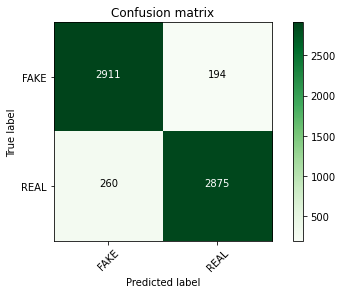

In [64]:
cm_pa_cv = metrics.confusion_matrix(y_test, pred_pa_cv, labels=[1, 0])
plot_confusion_matrix(cm_pa_cv, classes=['FAKE', 'REAL'])


In [65]:
print(metrics.classification_report(y_test, pred_pa_cv))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3135
           1       0.92      0.94      0.93      3105

    accuracy                           0.93      6240
   macro avg       0.93      0.93      0.93      6240
weighted avg       0.93      0.93      0.93      6240



In [66]:
x[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [67]:
# building Passive Aggressive Classifier 
# Applying Passive Aggressive Classifier

# Initialize a PassiveAggressiveClassifier
linear_clf = Pipeline([
        ('linear',tfidf_vectorizer),
        ('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('linear',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pa_clf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
       

In [68]:
#Predict on the test set and calculate accuracy

pred_pa_tfidf = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred_pa_tfidf)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.11%


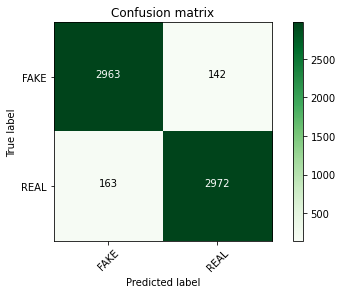

In [69]:
#Build confusion matrix

cm_pa_tfidf = metrics.confusion_matrix(y_test, pred_pa_tfidf, labels=[1, 0])
plot_confusion_matrix(cm_pa_tfidf, classes=['FAKE', 'REAL'])

In [74]:
print(metrics.classification_report(y_test, pred_pa_tfidf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3135
           1       0.95      0.95      0.95      3105

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



In [75]:
x[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

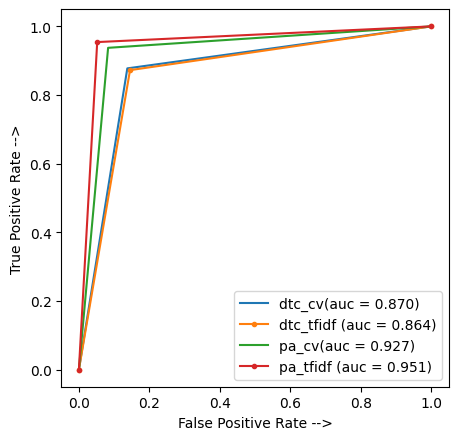

In [76]:
from sklearn.metrics import roc_curve, auc

dtc_cv_fpr, dtc_cv__tpr, threshold = roc_curve(y_test, y_pred_dtc_cv)
auc_dtc_cv = auc(dtc_cv_fpr, dtc_cv__tpr)

dtc_tfidf_fpr, dtc_tfidf_tpr, threshold = roc_curve(y_test, y_pred_dtc_tfidf)
auc_dtc_tfidf = auc(dtc_tfidf_fpr, dtc_tfidf_tpr)

pa_cv_fpr, pa_cv_tpr, threshold = roc_curve(y_test, pred_pa_cv)
auc_pa_cv = auc(pa_cv_fpr, pa_cv_tpr)

pa_tfidf_fpr, pa_tfidf_tpr, threshold = roc_curve(y_test, pred_pa_tfidf)
auc_pa_tfidf = auc(pa_tfidf_fpr, pa_tfidf_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_cv_fpr, dtc_cv__tpr, linestyle='-', label='dtc_cv(auc = %0.3f)' % auc_dtc_cv)
plt.plot(dtc_tfidf_fpr, dtc_tfidf_tpr, marker='.', label='dtc_tfidf (auc = %0.3f)' % auc_dtc_tfidf)
plt.plot(pa_cv_fpr, pa_cv_tpr, linestyle='-', label='pa_cv(auc = %0.3f)' % auc_pa_cv)
plt.plot(pa_tfidf_fpr, pa_tfidf_tpr, marker='.', label='pa_tfidf (auc = %0.3f)' % auc_pa_tfidf)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [77]:

# saving best model to the disk

model_file = "model.pkl"
pickle.dump(linear_clf,open(model_file,'wb'))

In [78]:
import pickle
var = input("Please enter the news text you want to verify: ")

# function to run for prediction
def detecting_fake_news(var):  
    
    #retrieving the best model for prediction call
    load_model = pickle.load(open('model.pkl', 'rb'))
    prediction = load_model.predict([var])
    if(prediction==1):
      prediction="fake"
    else:
      prediction="real"
    return (print("The given article is ",prediction))

if __name__ == '__main__':
    detecting_fake_news(var)


Please enter the news text you want to verify: House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license)  With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen.  As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight c

In [79]:
y[0]

1